### STAT3612 Homework 2+3
#### Name: Wong Chun Ho
#### UID: 3035277755

### Part I.

#### Step 1

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.linear_model import LinearRegression

data = pd.read_csv('BitCoin.csv', names=['Date', 'Price'])
# date = pd.to_datetime(data['Date'])
x = data.index
y = data['Price']

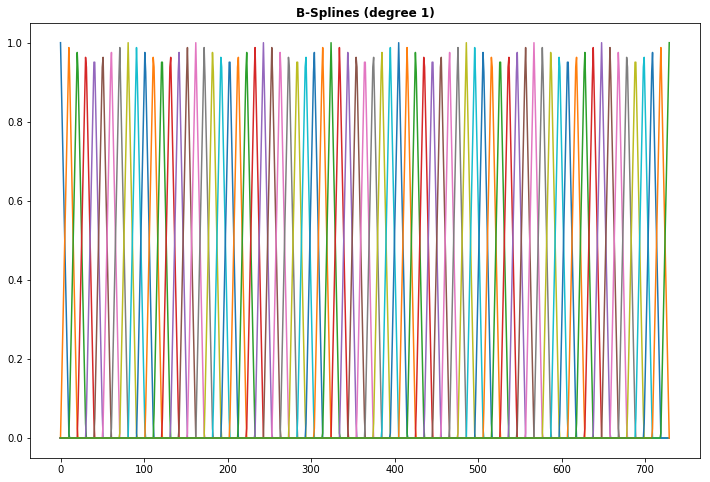

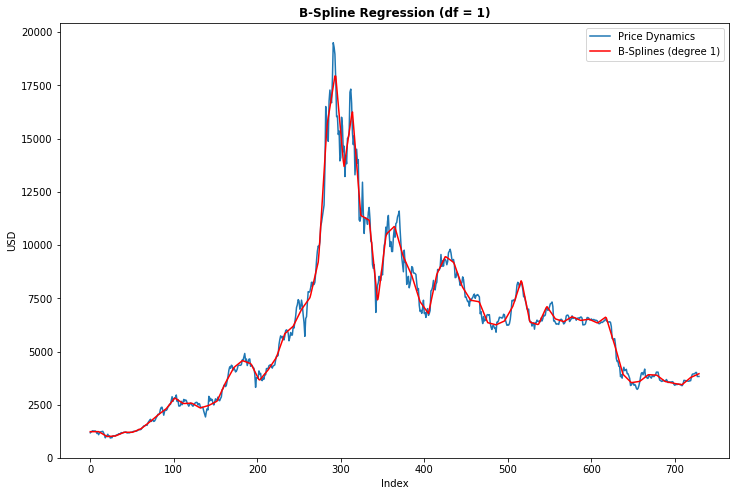

In [2]:
xphi = dmatrix("bs(x, df=73, degree=1, include_intercept=True) - 1", {"x": x})

linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

plt.subplots(figsize=(12, 8))
plt.plot(x, xphi)
plt.title('B-Splines (degree 1)', fontweight="bold")
plt.show()

plt.subplots(figsize=(12, 8))
plt.plot(x, y)
plt.plot(x, yfit, color="red")
plt.title('B-Spline Regression (df = 1)', fontweight="bold")
plt.xlabel('Index')
plt.ylabel('USD')
plt.legend(['Price Dynamics', 'B-Splines (degree 1)'])
plt.show()

#### Step 2

C:\Users\win8\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


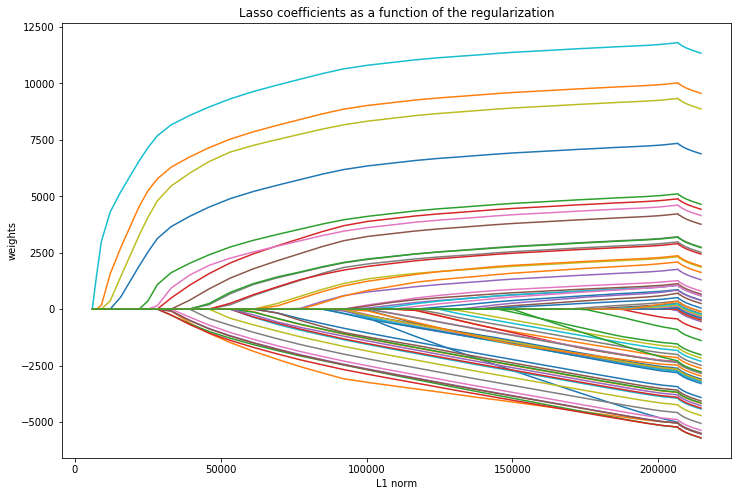

In [3]:
import numpy as np
from sklearn.linear_model import LassoCV, Lasso

alphas = np.logspace(-6, 3, 200)
l1_norm = []
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(xphi, y)
    l1_norm.append(abs(lasso.intercept_) + np.linalg.norm(lasso.coef_, ord=1))
    coefs.append(lasso.coef_)

plt.subplots(figsize=(12, 8))
plt.plot(l1_norm, coefs)
plt.xlabel('L1 norm')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

#### Step 3

30 important bases: 
 [   -0.         -2550.23490517 -2075.53207394 -2246.90140393
 -2020.6516682  -2042.65592547 -1878.8360971  -1569.16127464
 -1226.88272427  -933.59553539  -423.27187459  -681.42880881
  -666.50411443  -886.32025427  -806.27044952  -497.90737759
    -0.            -0.            -0.            -0.
    -0.            -0.            -0.             0.
     0.             0.             0.          1278.56896196
  7753.31269419 10190.39305986  5742.10683994  8405.64442845
  3544.72892152  3128.95903805     0.          2465.10738468
  3030.31109509  1626.21909082   570.41563122     0.
     0.           466.73813463  1647.34079517  1307.10840858
    29.90619101     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.            -0.            -0.
    -0.            -0.            -0.            -0.
    -0.      

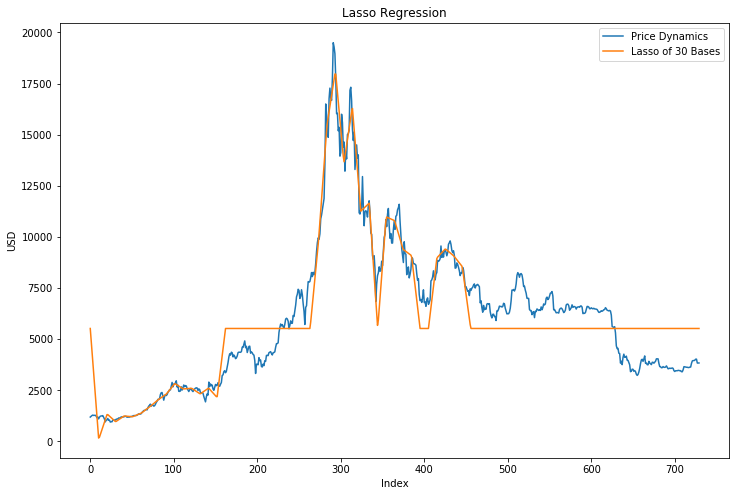

In [4]:
# Select subset of bases having 30 non-zero coefs from the solution paths
bases = []
for b in coefs:
    if len(b[b != 0]) == 30:
        bases = b
        break

print('30 important bases: \n', bases)

# Eliminate bases with coef = 0
xphi2 = xphi[:,bases != 0]
        
linreg2 = LinearRegression()
linreg2.fit(xphi2, y)
yfit2 = linreg2.predict(xphi2)

plt.subplots(figsize=(12, 8))
plt.plot(x, y)
plt.plot(x, yfit2)
plt.xlabel('Index')
plt.ylabel('USD')
plt.title('Lasso Regression')
plt.legend(['Price Dynamics', 'Lasso of 30 Bases'])
plt.show()

#### Step 4

Best Regularization Parameter:  2.0


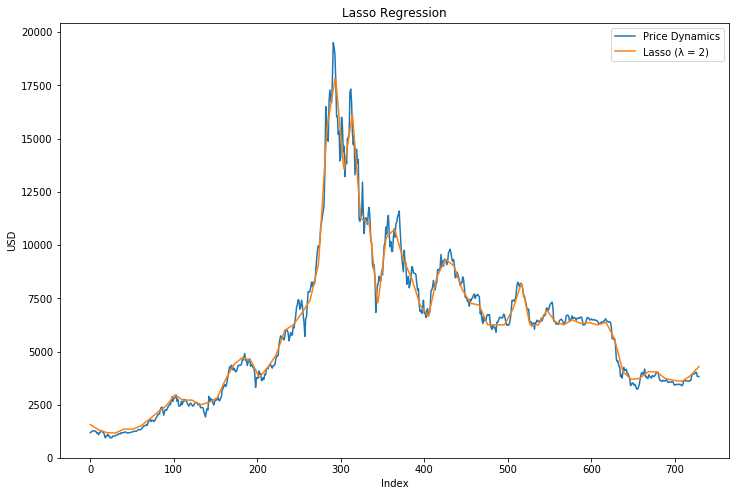

In [5]:
alphas = np.linspace(.00001, 2, 500)
# 5-folded cross-validation is used here.
lassoreg = LassoCV(alphas=alphas, cv=5, normalize=True)
lassoreg.fit(xphi, y)

print('Best Regularization Parameter: ', lassoreg.alpha_)

linreg_lasso = Lasso(alpha=lassoreg.alpha_)
linreg_lasso.fit(xphi, y)
yhat_lasso = linreg_lasso.predict(xphi)

plt.subplots(figsize=(12, 8))
plt.plot(x, y)
plt.plot(x, yhat_lasso)
plt.xlabel('Index')
plt.ylabel('USD')
plt.title('Lasso Regression')
plt.legend(['Price Dynamics', 'Lasso (λ = 2)'])
plt.show()

### Part II.